# Ejercicios de clase
### Autor: Pablo Benayas
1. Ejercicios:
    1. Ingesta de datos: Ejercicio wikipedia
    2. Preprocesado: Titanic
    3. Regresión: simple (salary data) y múltiple (calidad vino rojo)
    4. Clasificación y mejora de modelos: ejercicio del banco
    5. Clustering: k means en Mall_constumers
3. ¡Empecemos!

##### Cargo librerías

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot  as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import naive_bayes


from sklearn.metrics import accuracy_score, auc, confusion_matrix, f1_score, precision_score, recall_score, roc_curve
import matplotlib.pyplot  as plt

C:\Users\pablo\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.linear_model.logistic module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.linear_model. Anything that cannot be imported from sklearn.linear_model is now part of the private API.
  warnings.warn(message, FutureWarning)


# Web scrapping exercise

In [2]:
import requests
from bs4 import BeautifulSoup 
import pandas as pd

In [3]:
url = 'https://en.wikipedia.org/wiki/List_of_Asian_countries_by_area'
res = requests.get(url)
soup = BeautifulSoup(res.content,'lxml')
table=soup.find('table',{'class':'wikitable sortable'})
data=pd.read_html(str(table))[0] 
data

,Rank,Country,Area (km²),Notes
0,1.0,Russia*,13100000,"17,098,242 including European part[1]"
1,2.0,China,9596961,"excludes Hong Kong, Macau, Taiwan and disputed..."
2,3.0,India[2],3287263,NaN
3,4.0,Kazakhstan*,2455034,NaN
4,5.0,Saudi Arabia,2149690,NaN
5,6.0,Iran,1648195,NaN
6,7.0,Mongolia,1564110,NaN
7,8.0,Indonesia*,1472639,"1,904,569 km² including Oceanian part"
8,9.0,Pakistan,881913,NaN
9,10.0,Turkey*,747272,NaN


# Preprocesado: Titanic

#### Uno train y test para evitar hacer el pre-procesado dos veces.
#### Como medida de prevención creo una variable adicional 'dataset' con valor 'train' para las filas de train y 'test' para las de test.

In [4]:
train=pd.read_csv('train.csv')
train['dataset']='train'

test=pd.read_csv('test.csv')
test['dataset']='test'

data=pd.concat([train, test], axis=0)
data

C:\Users\pablo\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  import sys


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,dataset
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,train
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,train
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,train
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,train
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236,test
414,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,NaN,PC 17758,test
415,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,NaN,SOTON/O.Q. 3101262,test
416,NaN,NaN,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309,test


#### Evaluo los NAs por variable.
Importante: 'Survived' tiene NAs en el test set porque los valores del test están guardados en otro csv llamado 'gender_submission'

In [5]:
data.isnull().sum() 

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dataset           0
dtype: int64

#### Número de valores únicos

In [6]:
data.apply(lambda x: len(x.unique())) 

Age              99
Cabin           187
Embarked          4
Fare            282
Name           1307
Parch             8
PassengerId    1309
Pclass            3
Sex               2
SibSp             7
Survived          3
Ticket          929
dataset           2
dtype: int64

#### Los NAs son remplazados por la mediana

In [7]:
data['Age']=data.Age.fillna(data.Age.median()) 
data.Age.isnull().sum() 

0

#### La variable Cabin tiene muchos NAs. La convierto a binaria: 0 cuando es NA, 1 para el resto

In [8]:
print('ratio de NAs de la variable Cabin: {}%'.format(round((data.Cabin.isnull().sum()/len(data.Cabin))*100,3)))   
data['Cabin']=data.Cabin.fillna(0)
data['Cabin']=data.Cabin.apply(lambda x: 0 if x==0 else 1)
data.Cabin.isnull().sum() 

ratio de NAs de la variable Cabin: 77.464%


0

#### Los NAs de 'embarked' son remplazados por la moda

In [9]:
data['Embarked']=data.Embarked.fillna(data.Embarked.mode()[0]) 
data.Embarked.isnull().sum()   

0

#### Evaluo que variables siguen siendo nulas

In [10]:
data.isnull().sum() 

Age              0
Cabin            0
Embarked         0
Fare             1
Name             0
Parch            0
PassengerId      0
Pclass           0
Sex              0
SibSp            0
Survived       418
Ticket           0
dataset          0
dtype: int64

#### Remplazo el NA de 'Fare' por la mediana

In [11]:
data['Fare']=data.Fare.fillna(data.Fare.median()) 
data.Fare.isnull().sum() 

0

###### Tiene sentido que Survived tenga NAs por lo que mencioné anteriormente del dataset donde está guardado el y_test

In [12]:
data.isnull().sum() 

Age              0
Cabin            0
Embarked         0
Fare             0
Name             0
Parch            0
PassengerId      0
Pclass           0
Sex              0
SibSp            0
Survived       418
Ticket           0
dataset          0
dtype: int64

#### Tema NAs cerrado, ahora voy a convertir las variables objeto a numéricas

In [13]:
data.dtypes

Age            float64
Cabin            int64
Embarked        object
Fare           float64
Name            object
Parch            int64
PassengerId      int64
Pclass           int64
Sex             object
SibSp            int64
Survived       float64
Ticket          object
dataset         object
dtype: object

In [14]:
data.apply(lambda x: len(x.unique())) 

Age              98
Cabin             2
Embarked          3
Fare            281
Name           1307
Parch             8
PassengerId    1309
Pclass            3
Sex               2
SibSp             7
Survived          3
Ticket          929
dataset           2
dtype: int64

#### La variable Names tiene tantos valores únicos como filas. Al no aportar información adicional, la elimino. 
###### Es cierto que se podría crear una nueva variable con 'Names' que agrupe los 'titulos' de las pasajeros: 'Miss', 'Mister',etc; en categorías

In [15]:
data.Name

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
413                                   Spector, Mr. Woolf
414                         Oliva y Ocana, Dona. Fermina
415                         Saether, Mr. Simon Sivertsen
416                                  Ware, Mr. Frederick
417                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

###### Elimino la variable 'Name' y 'Ticket'

In [16]:
data=data.loc[:,list(pd.DataFrame(data.columns).apply(lambda x: x[0] not in ['Name', 'Ticket'], axis=1))]     
data.columns

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Parch', 'PassengerId', 'Pclass',
       'Sex', 'SibSp', 'Survived', 'dataset'],
      dtype='object')

###### Uso LabelEncoder() para las dos variables categóricas que quedan

In [17]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# transform variables with low unique values by using label encoder

transform1 = LabelEncoder() 

transform1.fit_transform(list(data.Embarked.unique()))
data['Embarked'] = transform1.transform(data.Embarked)

transform1.fit_transform(list(data.Sex.unique()))
data['Sex'] = transform1.transform(data.Sex)


data.dtypes

C:\Users\pablo\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\pablo\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


Age            float64
Cabin            int64
Embarked         int32
Fare           float64
Parch            int64
PassengerId      int64
Pclass           int64
Sex              int32
SibSp            int64
Survived       float64
dataset         object
dtype: object

##### Pruebo que no tengo errores al tirar un modelo

In [18]:
labels=pd.read_csv('gender_submission.csv')
print(len(labels)) 
data.loc[data.dataset=='test','Survived']=labels.Survived
X, y=data.iloc[:,:-2], data.iloc[:,-2]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 3, stratify=y) 

## métricas
def saca_metricas(y1, y2): #y_real (y_test) and y_pred
    print('matriz de confusión')
    print(confusion_matrix(y1, y2))
    print('accuracy')
    print(accuracy_score(y1, y2))
    print('precision')
    print(precision_score(y1, y2))
    print('recall')
    print(recall_score(y1, y2))
    print('f1')
    print(f1_score(y1, y2))
    false_positive_rate, recall, thresholds = roc_curve(y1, y2)
    roc_auc = auc(false_positive_rate, recall)
    print('AUC')
    print(roc_auc)
    plt.plot(false_positive_rate, recall, 'b')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.title('AUC = %0.2f' % roc_auc)

418


C:\Users\pablo\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


C:\Users\pablo\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


matriz de confusión
[[180  24]
 [ 23 101]]
accuracy
0.8567073170731707
precision
0.808
recall
0.8145161290322581
f1
0.8112449799196787
AUC
0.8484345351043643


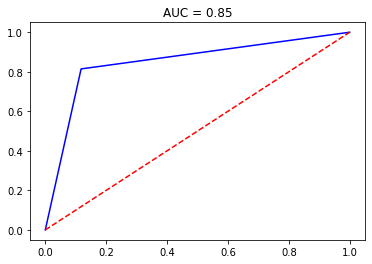

In [19]:
classifier = LogisticRegression().fit(X_train, y_train)
y_pred     = classifier.predict(X_test)
saca_metricas(y_test, y_pred) 

# Ejercicio de regresión lineal simple: salarios

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
# %matplotlib notebook

In [21]:
df=pd.read_csv('Salary_Data.csv')
df.head(2) 

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0


In [22]:
X, y = df.iloc[:,:1], df.iloc[:,1:] 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) 
# DO NOT  use 'stratify' argument for regression problems

model=LinearRegression()
model.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

y_pred vs y_test

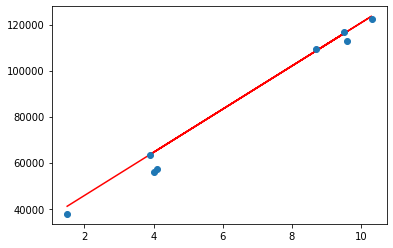

In [23]:
y_pred=model.predict(X_test)
plt.plot(X_test, y_pred, 'r')
plt.plot(X_test, y_test, 'o')

# Ejercicio de regresión lineal múltiple: vinos

In [24]:
df=pd.read_csv('winequality-red.csv', sep=';')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [25]:
df.isnull().sum() 

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

##### Evaluo los datos con 'describe()'
###### Al no conocer las variables con profundidad, voy a asumir que los máximos que quedan alejados del rango intercuartílico son datos válidos

In [26]:
round(df.describe(),3) 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000
mean,8.320,0.528,0.271,2.539,0.087,15.875,46.468,0.997,3.311,0.658,10.423,5.636
std,1.741,0.179,0.195,1.410,0.047,10.460,32.895,0.002,0.154,0.170,1.066,0.808
min,4.600,0.120,0.000,0.900,0.012,1.000,6.000,0.990,2.740,0.330,8.400,3.000
25%,7.100,0.390,0.090,1.900,0.070,7.000,22.000,0.996,3.210,0.550,9.500,5.000
50%,7.900,0.520,0.260,2.200,0.079,14.000,38.000,0.997,3.310,0.620,10.200,6.000
75%,9.200,0.640,0.420,2.600,0.090,21.000,62.000,0.998,3.400,0.730,11.100,6.000
max,15.900,1.580,1.000,15.500,0.611,72.000,289.000,1.004,4.010,2.000,14.900,8.000


In [27]:
def calculateVIF(data):
    features = list(data.columns)
    num_features = len(features)
    
    model = LinearRegression()
    
    result = pd.DataFrame(index = ['VIF'], columns = features)
    result = result.fillna(0)
    
    for ite in range(num_features):
        x_features = features[:]
        y_featue = features[ite]
        x_features.remove(y_featue)
        
        x = data[x_features]
        y = data[y_featue]
        
        model.fit(data[x_features], data[y_featue])
        
        result[y_featue] = 1/(1 - model.score(data[x_features], data[y_featue]))
    
    return result

calculateVIF(df)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
VIF,7.772051,1.879663,3.131055,1.703859,1.500591,1.96801,2.214467,6.346491,3.339511,1.487286,3.238899,1.563848


Regla general para interpretar el VIF:
    1. Si VIF=1, varaibles no está correlacionada
    2. Entre 1 - 5, moderadamente correlacinada
    3. Más de 5, altamente correlacionada

In [28]:
def selectDataUsingVIF(data, max_VIF = 5):
    result = data.copy(deep = True)
    
    VIF = calculateVIF(result)
    
    while VIF.as_matrix().max() > max_VIF:
        col_max = np.where(VIF == VIF.as_matrix().max())[1][0]
        features = list(result.columns)
        features.remove(features[col_max])
        result = result[features]
        
        VIF = calculateVIF(result)
        
    return result

calculateVIF(selectDataUsingVIF(df))

C:\Users\pablo\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\pablo\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys
C:\Users\pablo\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
VIF,1.874221,2.782222,1.386862,1.421802,1.944737,2.099856,2.430116,1.627819,1.452106,2.365045,1.562935


In [29]:
variables_seleccionadas=list(calculateVIF(selectDataUsingVIF(df)).columns) 
df=df.loc[:,variables_seleccionadas]

C:\Users\pablo\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\pablo\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys
C:\Users\pablo\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


#### Al ser una regresión múltiple no se puede pintar la gráfica bidimensional

In [30]:
X, y = df.iloc[:,:-1], df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
model=LinearRegression()
model.fit(X_train, y_train) 
y_pred=model.predict(X_test) 


check_list=pd.DataFrame({'y_pred':y_pred, 'real_value':y_test})
check_list['y_pred']=check_list['y_pred'].apply(lambda x: round(x,3))
check_list

,y_pred,real_value
1109,5.760,6
1032,5.036,5
1002,6.562,7
487,5.367,6
979,5.871,5
...,...,...
489,5.868,6
362,5.493,5
526,5.944,5
442,5.769,7


###### medias de 'y_pred' y 'y_test'. 
###### Si la predicción es buena no tendría que haber diferencia significativa

In [31]:
round(check_list.y_pred.mean(),4), check_list.real_value.mean() 

(5.6722, 5.6175)

# Clasificación y mejora de modelos: ejercicio del banco

In [482]:
df=pd.read_csv('bank-full.csv',sep=';')
df.loc[df.job=='admin.',:] 

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
10,41,admin.,divorced,secondary,no,270,yes,no,unknown,5,may,222,1,-1,0,unknown,no
11,29,admin.,single,secondary,no,390,yes,no,unknown,5,may,137,1,-1,0,unknown,no
16,45,admin.,single,unknown,no,13,yes,no,unknown,5,may,98,1,-1,0,unknown,no
25,44,admin.,married,secondary,no,-372,yes,no,unknown,5,may,172,1,-1,0,unknown,no
32,60,admin.,married,secondary,no,39,yes,yes,unknown,5,may,208,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45171,33,admin.,single,secondary,no,690,no,no,cellular,10,nov,223,3,555,16,failure,no
45173,36,admin.,single,tertiary,no,980,no,no,cellular,11,nov,118,4,104,7,failure,no
45176,54,admin.,married,secondary,no,66,yes,no,cellular,11,nov,167,1,-1,0,unknown,yes
45177,36,admin.,divorced,secondary,no,1224,yes,no,cellular,12,nov,482,1,374,1,success,yes


In [483]:
print('ratio de "no" de la variable objetivo: {}%'.format(round(sum(df.y=='no')/len(df)*100,3))) 
print('ratio de "yes" de la variable objetivo: {}%'.format(round(sum(df.y=='yes')/len(df)*100,3))) 

ratio de "no" de la variable objetivo: 88.302%
ratio de "yes" de la variable objetivo: 11.698%


if var is of type 'object', then that var is categorical

In [484]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [485]:
df.isnull().sum() 

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [486]:
df.apply(lambda x: len(x.unique()), axis=0) 

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [487]:
df.marital.unique() 

array(['married', 'single', 'divorced'], dtype=object)

##### Dado que LabelEncoder ordena los valores únicos alfabéticamente y los pasa a númerico
Voy a crear una leyenda que relaciona el número de LabelEncoder con su categoría de origen

Pero primero, demuestro que LabelEncoder ordena los valores únicos alfabéticamente

In [489]:
ejemplo=pd.DataFrame({'col1':['dog','cat','dog','monkey','iguana','cat']})
transform1 = LabelEncoder() 
transform1.fit_transform(list(ejemplo['col1'].unique())) 
ejemplo['col2']=transform1.transform(ejemplo['col1'])
print('Como se puede observar el orden alfabético es respetado. \n "cat" recibe el valor más bajo (cero), y así sucesivamente.')
ejemplo

Como se puede observar el orden alfabético es respetado. 
 "cat" recibe el valor más bajo (cero), y así sucesivamente.


,col1,col2
0,dog,1
1,cat,0
2,dog,1
3,monkey,3
4,iguana,2
5,cat,0


In [490]:
def leyenda_valores_LabelEncoder(lista_de_variables):
    dicc={}
    for col in lista_de_variables:
        values=list(df[str(col)].unique())  
        values.sort()
        dicc['values_'+str(col)]=pd.DataFrame({'values':values, 
                                 'LabelEncoder equivalent':[i for i in range(len(values))]})
    return dicc

l=[]
for i in df.columns:
    l.append(len(df[i].unique())<13)
l=list(df.columns[l])  
leyendas_de_LabelEncoder=leyenda_valores_LabelEncoder(l) 
# leyendas_de_LabelEncoder['values_marital'] 

In [491]:
# transformar variables con pocos valores unicos con label encoder.
# Label encoder ordena las categorías alfabéticamente

dictRecode={}

l=[]
transform1 = LabelEncoder() 
for i in df.columns:
    l.append(len(df[i].unique())<13) 
categVars=df.loc[:,l]
for i in categVars:
    transform1.fit_transform(list(df[i].unique()))
    dictRecode[i]=transform1.transform(df[i])
df.loc[:,l]=pd.DataFrame(dictRecode) 

In [492]:
df.iloc[10,:]  

age           41
job            0
marital        0
education      1
default        0
balance      270
housing        1
loan           0
contact        2
day            5
month          8
duration     222
campaign       1
pdays         -1
previous       0
poutcome       3
y              0
Name: 10, dtype: int64

In [493]:
X, y = df.iloc[:,:-1], df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 3, stratify=y)

In [494]:
corr = abs(df.corr())
corr[['y']].sort_values(by = 'y',ascending = False).style.background_gradient() 

,y
y,1
duration,0.394521
contact,0.148395
housing,0.139173
pdays,0.103621
previous,0.0932358
poutcome,0.0778404
campaign,0.073172
loan,0.068185
education,0.0662406


### Selecciono las variables con correlación superior a 0.01 con la variable objetivo

In [495]:
corr = abs(df.corr()) 
mask=(corr.loc['y',:].sort_values(ascending=False)>0.01)
mask=list(mask.index[mask]) 
df=df.loc[:,mask]
df.columns

Index(['y', 'duration', 'contact', 'housing', 'pdays', 'previous', 'poutcome',
       'campaign', 'loan', 'education', 'balance', 'marital', 'job', 'day',
       'age', 'month', 'default'],
      dtype='object')

### Estudio la multicolinearidad
##### Hago un filtro de la matriz correlaciones para identificar aquellas correlaciones superiores a 0.7.

In [496]:
round(df.corr()[df.corr()>0.7],3)  

,y,duration,contact,housing,pdays,previous,poutcome,campaign,loan,education,balance,marital,job,day,age,month,default
y,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
housing,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pdays,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
previous,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
poutcome,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
campaign,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### visualizo las columnas restantes
No se observa multicolinearidad 

In [497]:
# df.corr()[df.corr()>0.7].loc[:,'poutcome':'poutcome_failure']

In [498]:
## métricas

def saca_metricas(y1, y2): #y_real (y_test) and y_pred
    print('matriz de confusión')
    print(confusion_matrix(y1, y2))
    print('accuracy')
    print(accuracy_score(y1, y2))
    print('precision')
    print(precision_score(y1, y2))
    print('recall')
    print(recall_score(y1, y2))
    print('f1')
    print(f1_score(y1, y2))
    false_positive_rate, recall, thresholds = roc_curve(y1, y2)
    roc_auc = auc(false_positive_rate, recall)
    print('AUC')
    print(roc_auc)
    plt.plot(false_positive_rate, recall, 'b')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.title('AUC = %0.2f' % roc_auc)
    

Regresión Logística

C:\Users\pablo\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


matriz de confusión
[[9783  198]
 [1092  230]]
accuracy
0.8858710076970716
precision
0.5373831775700935
recall
0.17397881996974282
f1
0.26285714285714284
AUC
0.5770705641778381


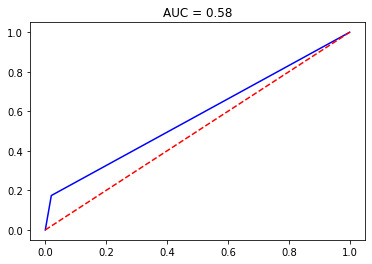

In [499]:
classifier = LogisticRegression().fit(X_train, y_train)
y_pred     = classifier.predict(X_test)
saca_metricas(y_test, y_pred) 

#### Hay que mejorar el modelo

In [500]:
corr = abs(df.corr())
corr[['y']].sort_values(by = 'y',ascending = False).style.background_gradient() 

,y
y,1
duration,0.394521
contact,0.148395
housing,0.139173
pdays,0.103621
previous,0.0932358
poutcome,0.0778404
campaign,0.073172
loan,0.068185
education,0.0662406


In [501]:
df.apply(lambda x: len(x.unique())) 

y               2
duration     1573
contact         3
housing         2
pdays         559
previous       41
poutcome        4
campaign       48
loan            2
education       4
balance      7168
marital         3
job            12
day            31
age            77
month          12
default         2
dtype: int64

In [502]:
def proporciones_final (var,target,df):

    proporcion = pd.DataFrame()

    proporcion['%depositos'] = df[target].groupby(df[var]).mean()*100 
    proporcion['Conteo'] = df[target].groupby(df[var]).count() 
    proporcion= proporcion.round(3)   
    proporcion_filtered = proporcion[(proporcion['%depositos']>0) & (proporcion['Conteo']>10)]
        
    if len(proporcion_filtered)<100 and len(proporcion_filtered)>1:
        fig = plt.figure()
        ax = proporcion_filtered['Conteo'].plot(kind='bar',grid=True)
                
        ax2 = ax.twinx()
        ax2.plot(proporcion_filtered['%depositos'].values, linestyle='-', linewidth=2.0,color='g')
        plt.tight_layout()        
    
    else:        
        proporcion_filtered.reset_index(inplace=True)
        sns.lmplot(x = var,y ='%depositos',data=proporcion_filtered, fit_reg=True,ci=None) 

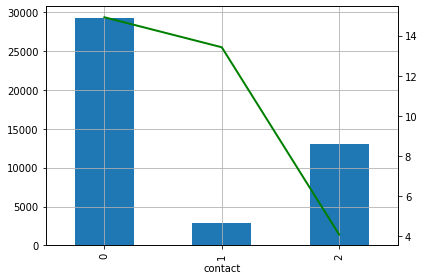

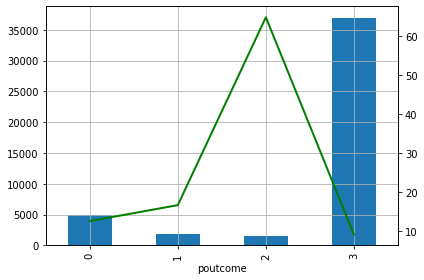

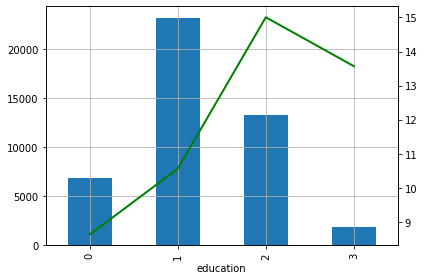

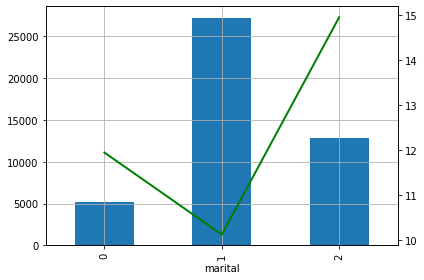

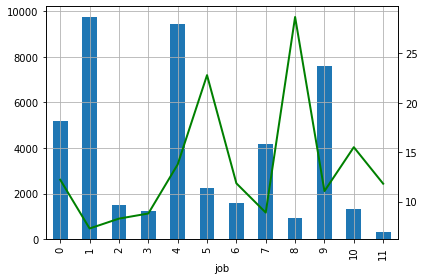

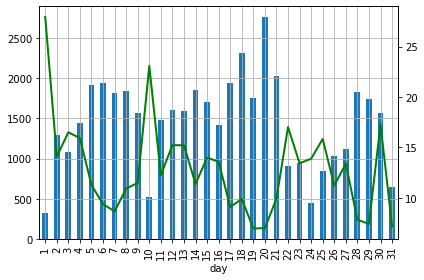

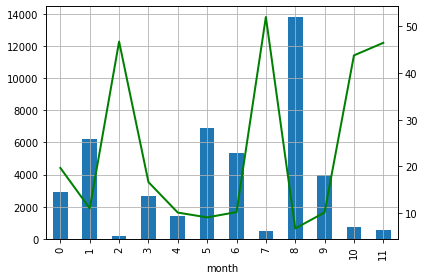

In [503]:
varsToPlot=df.loc[:,pd.DataFrame(df.columns, index=df.columns).apply(lambda x: len(df[x[0]].unique())<32 and len(df[x[0]].unique())>2, axis=1)]   
varsToPlot=varsToPlot.loc[:,list(pd.DataFrame(varsToPlot.columns).apply(lambda x: x[0] not in 'y', axis=1))] 

for i in varsToPlot.columns:
    proporciones_final (i, 'y', df) 

##### Interpreto los valores númericos de LabelEncoder con el diccionario que creé previamente 'leyendas_de_LabelEncoder

In [504]:
print(leyendas_de_LabelEncoder['values_contact']) 
print(leyendas_de_LabelEncoder['values_poutcome'])
print(leyendas_de_LabelEncoder['values_education']) 
print(leyendas_de_LabelEncoder['values_marital'])
print(leyendas_de_LabelEncoder['values_job'])

      values  LabelEncoder equivalent
0   cellular                        0
1  telephone                        1
2    unknown                        2
    values  LabelEncoder equivalent
0  failure                        0
1    other                        1
2  success                        2
3  unknown                        3
      values  LabelEncoder equivalent
0    primary                        0
1  secondary                        1
2   tertiary                        2
3    unknown                        3
     values  LabelEncoder equivalent
0  divorced                        0
1   married                        1
2    single                        2
           values  LabelEncoder equivalent
0          admin.                        0
1     blue-collar                        1
2    entrepreneur                        2
3       housemaid                        3
4      management                        4
5         retired                        5
6   self-employed            

##### Creamos variables binarias

In [505]:
df['job_status_student_or_retired']=df.job.apply(lambda x: 1 if x in [5,8] else 0)
df['marital_status_single']=df.marital.apply(lambda x: 1 if x in [2] else 0)
df['education_terciary_or_unknown']=df.education.apply(lambda x: 1 if x in [2,3] else 0) 
df['contact_type_cellular_or_telephone']=df.contact.apply(lambda x: 1 if x in [0,1] else 0)
df['March_Aug_Nov_Dec']=df.month.apply(lambda x: 1 if x in [2,7,10,11] else 0)
df['poutcome_success']=df.poutcome.apply(lambda x: 1 if x in [2] else 0)

In [506]:
corr = abs(df.corr())
corr[['y']].sort_values(by = 'y',ascending = False).style.background_gradient() 

,y
y,1
duration,0.394521
poutcome_success,0.306788
March_Aug_Nov_Dec,0.235537
contact_type_cellular_or_telephone,0.150935
contact,0.148395
housing,0.139173
job_status_student_or_retired,0.110101
pdays,0.103621
previous,0.0932358


###### Variables numéricas con muchos valores únicos

In [507]:
# df.loc[:,pd.DataFrame(df.columns, index=df.columns).apply(lambda x: len(df[x[0]].unique())>32, axis=1)]  
numeric_vars=df.loc[:,pd.DataFrame(df.columns, index=df.columns).apply(lambda x: len(df[x[0]].unique())>31, axis=1)]
percentiles=numeric_vars.apply(lambda x: x.describe()).loc[['min','25%','50%','75%','max'],:] 
percentiles

,duration,pdays,previous,campaign,balance,age
min,0.0,-1.0,0.0,1.0,-8019.0,18.0
25%,103.0,-1.0,0.0,1.0,72.0,33.0
50%,180.0,-1.0,0.0,2.0,448.0,39.0
75%,319.0,-1.0,0.0,3.0,1428.0,48.0
max,4918.0,871.0,275.0,63.0,102127.0,95.0


#### 'pdays', 'previous' y 'campaign' tiene al menos 50% de sus valores del mismo tipo.
#### Más tarde, volveré a estas variables

### Visualizo las restantes

In [508]:
def visualizar_variables_numericas_binarizadas(dataset, q, target='y'):
    sin_la_target=dataset.loc[:, dataset.columns != target]
    new_vars={}
    values=[i for i in range(q)]
    for i in range(len(sin_la_target.columns)):
        new_vars[str(sin_la_target.columns[i])]=pd.qcut(dataset[str(sin_la_target.columns[i])], 
                                                         q=q, labels=values)
    vars_to_plot=pd.DataFrame(new_vars).fillna(0) 
    target=pd.DataFrame(dataset[target])
    new_continuous_vars=pd.concat([target, vars_to_plot.reindex(target.index)], axis=1)  
    for i in vars_to_plot.columns:
        proporciones_final(i, 'y', new_continuous_vars) 
        # Si en vez de "'y'" pongo "target" me da error

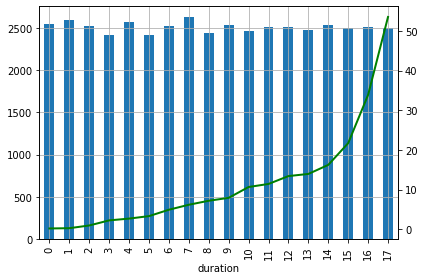

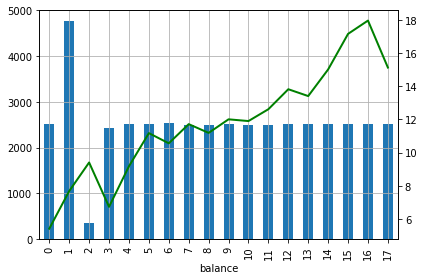

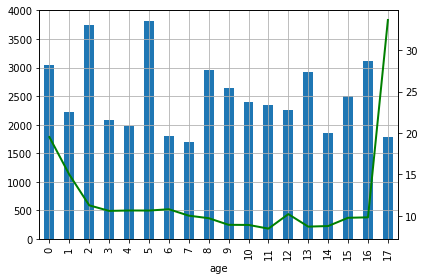

In [509]:
continuous_vars=df.loc[:,['duration','balance','age','y']]
visualizar_variables_numericas_binarizadas(dataset=continuous_vars, q=18) 

#### En la variable 'age' se observa un comportamiento anómalo en el último intervalo.
#### Voy a identificar los valores que corresponden a este último intervalo

In [510]:
pd.qcut(df.age, q=18).unique()  

[(55.0, 59.0], (43.0, 45.0], (32.0, 33.0], (45.0, 47.0], (33.0, 35.0], ..., (37.0, 39.0], (35.0, 36.0], (47.0, 50.0], (36.0, 37.0], (29.0, 31.0]]
Length: 18
Categories (18, interval[float64]): [(17.999, 27.0] < (27.0, 29.0] < (29.0, 31.0] < (31.0, 32.0] ... (50.0, 52.0] < (52.0, 55.0] < (55.0, 59.0] < (59.0, 95.0]]

In [511]:
df['edad_60+']=df.age.apply(lambda x: 1 if x>59 else 0)

#### Vuelvo a 'pdays', 'previous' y 'campaign'

In [512]:
odd_numeric_vars=df.loc[:,['pdays','previous','campaign']] 
print('len(df)={}'.format(len(df)))
odd_numeric_vars.apply(lambda x: x.value_counts()) 

len(df)=45211


,pdays,previous,campaign
-1,36954.0,NaN,NaN
0,NaN,36954.0,NaN
1,15.0,2772.0,17544.0
2,37.0,2106.0,12505.0
3,1.0,1142.0,5521.0
...,...,...,...
838,1.0,NaN,NaN
842,1.0,NaN,NaN
850,1.0,NaN,NaN
854,1.0,NaN,NaN


##### En 'pdays' transformo los -1 en 0

In [513]:
df['pdays']=df.pdays.apply(lambda x: 0 if x==-1 else x)
df.pdays.value_counts()

0      36954
182      167
92       147
183      126
91       126
       ...  
717        1
589        1
493        1
45         1
831        1
Name: pdays, Length: 559, dtype: int64

In [514]:
df['more_than_zero_pdays']=df.pdays.apply(lambda x: 0 if x==0 else 1)
df['first_time_asking_for_loan']=df.previous.apply(lambda x: 1 if x==0 else 0)
df['more_than_two_campaigns']=df.campaign.apply(lambda x: 1 if x>2 else 0) 

In [515]:
corr = abs(df.corr())
corr[['y']].sort_values(by = 'y',ascending = False).style.background_gradient()  

,y
y,1
duration,0.394521
poutcome_success,0.306788
March_Aug_Nov_Dec,0.235537
first_time_asking_for_loan,0.167263
more_than_zero_pdays,0.167263
contact_type_cellular_or_telephone,0.150935
contact,0.148395
housing,0.139173
edad_60+,0.138319


#### Eliminamos las variables con alta multicolinearidad

In [517]:
round(df.corr()[df.corr()>0.7],4) 

,y,duration,contact,housing,pdays,previous,poutcome,campaign,loan,education,...,job_status_student_or_retired,marital_status_single,education_terciary_or_unknown,contact_type_cellular_or_telephone,March_Aug_Nov_Dec,poutcome_success,edad_60+,more_than_zero_pdays,first_time_asking_for_loan,more_than_two_campaigns
y,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
housing,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pdays,NaN,NaN,NaN,NaN,1.0000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.8695,NaN,NaN
previous,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
poutcome,NaN,NaN,NaN,NaN,NaN,NaN,1.0000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9412,NaN
campaign,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0000,...,NaN,NaN,0.8523,NaN,NaN,NaN,NaN,NaN,NaN,NaN


###### Visualizo las columnas restantes

In [518]:
round(df.corr()[df.corr()>0.7],4).loc[:,'education':'job_status_student_or_retired']

,education,balance,marital,job,day,age,month,default,job_status_student_or_retired
y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
housing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pdays,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
previous,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
poutcome,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
campaign,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,1.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Elimino 'poutcome', 'pdays', 'education' y 'marital' porque están menos correladas con la objetivo que la otra variable con la que están altamente correlada.

In [519]:
df=df.loc[:,list(pd.DataFrame(df.columns).apply(lambda x: x[0] not in ['poutcome','pdays',
                                                                       'education',
                                                                       'marital'], axis=1))]

In [520]:
df.columns

Index(['y', 'duration', 'contact', 'housing', 'previous', 'campaign', 'loan',
       'balance', 'job', 'day', 'age', 'month', 'default',
       'job_status_student_or_retired', 'marital_status_single',
       'education_terciary_or_unknown', 'contact_type_cellular_or_telephone',
       'March_Aug_Nov_Dec', 'poutcome_success', 'edad_60+',
       'more_than_zero_pdays', 'first_time_asking_for_loan',
       'more_than_two_campaigns'],
      dtype='object')

matriz de confusión
[[9747  234]
 [1021  301]]
accuracy
0.8889675307440502
precision
0.5626168224299065
recall
0.22768532526475038
f1
0.32417878298330643
AUC
0.6021203903149721


C:\Users\pablo\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


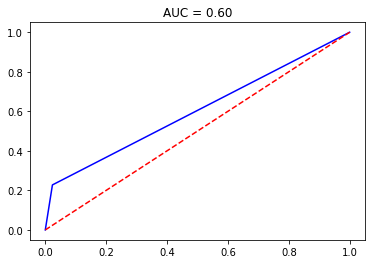

In [521]:
X, y=df.loc[:,df.columns!='y'], df.loc[:,'y']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 3, stratify=y)
classifier = LogisticRegression().fit(X_train, y_train)
y_pred     = classifier.predict(X_test)
saca_metricas(y_test, y_pred) 

RandomForest con parámetros por defecto

matriz de confusión
[[9678  303]
 [ 775  547]]
accuracy
0.9046270901530568
precision
0.6435294117647059
recall
0.41376701966717094
f1
0.503683241252302
AUC
0.6917046700379738


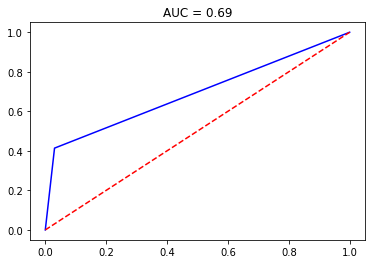

In [522]:
rf_classifier = RandomForestClassifier().fit(X_train, y_train)
y_pred        = rf_classifier.predict(X_test)
saca_metricas(y_test, y_pred) 

XGBClassifier con parámetros por defecto

matriz de confusión
[[9582  399]
 [ 688  634]]
accuracy
0.9038308413695479
precision
0.6137463697967086
recall
0.4795763993948563
f1
0.5384288747346073
AUC
0.7198002225408305


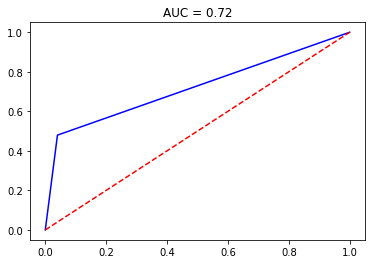

In [523]:
boost_classifier=XGBClassifier().fit(X_train, y_train)
y_pred=boost_classifier.predict(X_test) 
saca_metricas(y_test, y_pred) 

# Ejercicio de clustering: Mall_customer

In [81]:
from sklearn.datasets import make_blobs
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot  as plt
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
import pandas as pd

In [82]:
df=pd.read_csv('Mall_Customers.csv')
df 

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


###### Voy a usar solo dos variables ('Annual Income (k$)' y 'Spending Score (1-100)'. Elijo solo dos variables porque quiero poder visualizar la nube de puntos en 2d.
###### Otro opción sería hacer Componentes principales y coger las dos primeras. De esta manera, hacer el gráfico con PC1 y PC2

Para elegir el número de grupos uso el método de 'within sum of squares' y el 'silhoutte'.


Es importante recalcar que en wss, se busca el numero de clusters que da la mayor bajada en la media de los mínimos cuadrados de dichos clusters. 

Si se quisiera minimizar a cero el wss, simplemente habría que  seleccionar tantos clusters como observaciones del dataset. Pero eso no es el objetivo.


La métrica silhoutte tiene un rango de valores entre -1 y +1, donde un valor alto indicta que el punto en cuestión está bien integrado en su cluster y pobremente integrado en clusters vecinos.

##### Por tanto, quiero el número de clusters que tiene una bajada fuerte en wss y una subida fuerte en el valor de la silhuette. En este caso el número de cluster sería 3 o 5. Ambos son buenos valores. Pero voy a seleccionar 5.

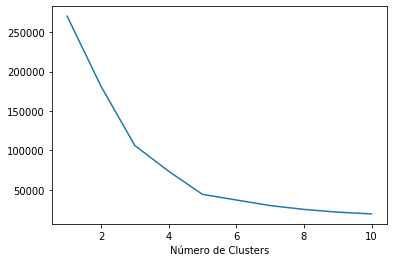

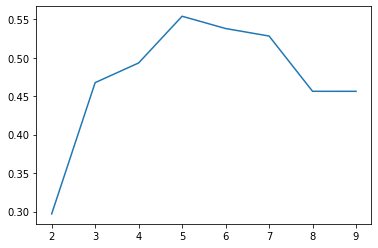

In [83]:
X=df.loc[:,['Annual Income (k$)','Spending Score (1-100)']].values

sse = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)
plt.plot(range(1, 11), sse)
plt.xlabel('Número de Clusters')
plt.show() 

sillhouette_avgs = []
max_k = 10
n_init = 10

for k in range(2, max_k):
    kmean = KMeans(n_clusters = k, n_init = n_init).fit(X)
    sillhouette_avgs.append(silhouette_score(X, kmean.labels_))
        
plt.plot(range(2, max_k), sillhouette_avgs) 

###### y_kmeans devuelve el cluster al que pertenece cada una de las observaciones

In [84]:
kmeans = KMeans(n_clusters = 5).fit(X)
y_kmeans=kmeans.fit_predict(X) 
y_kmeans

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 4,
       3, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 1, 2, 4, 2, 1, 2, 1, 2,
       4, 2, 1, 2, 1, 2, 1, 2, 1, 2, 4, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

###### Dibujo los clusters

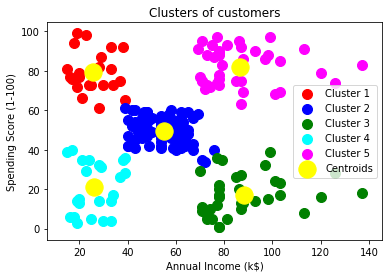

In [85]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 4277)
y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show() 